# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [16]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | chauk
Processing Record 3 of Set 1 | dhaurahra
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | ulladulla
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | rongelap
Processing Record 10 of Set 1 | the pas
Processing Record 11 of Set 1 | college
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | kimbe
Processing Record 14 of Set 1 | douz
Processing Record 15 of Set 1 | minas de marcona
Processing Record 16 of Set 1 | fort william
Processing Record 17 of Set 1 | hamilton
Processing Record 18 of Set 1 | st. john's
Processing Record 19 of Set 1 | solnechnyy
Processing Record 20 of Set 1 | artashat
Processing Record 21 of Set 1 | silver city
Processing Record 22 of Set 1 | yellowknife
Processing Record 23 of Se

Processing Record 37 of Set 4 | khoyniki
Processing Record 38 of Set 4 | tera
Processing Record 39 of Set 4 | ust-nera
Processing Record 40 of Set 4 | colonia
Processing Record 41 of Set 4 | springs
Processing Record 42 of Set 4 | ola
Processing Record 43 of Set 4 | la cruz
Processing Record 44 of Set 4 | tsetserleg
Processing Record 45 of Set 4 | oamaru
Processing Record 46 of Set 4 | guerrero negro
Processing Record 47 of Set 4 | zuidhorn
Processing Record 48 of Set 4 | pariaman
Processing Record 49 of Set 4 | sokcho
Processing Record 0 of Set 5 | flin flon
Processing Record 1 of Set 5 | ivanovskoye
Processing Record 2 of Set 5 | kijang
Processing Record 3 of Set 5 | bethanie
Processing Record 4 of Set 5 | newman
Processing Record 5 of Set 5 | pathein
Processing Record 6 of Set 5 | caleta de carquin
Processing Record 7 of Set 5 | ghadamis
Processing Record 8 of Set 5 | hassi messaoud
Processing Record 9 of Set 5 | harper
Processing Record 10 of Set 5 | letlhakane
Processing Record 11

Processing Record 33 of Set 8 | coyula
Processing Record 34 of Set 8 | pancas
Processing Record 35 of Set 8 | kerikeri
Processing Record 36 of Set 8 | mariental
Processing Record 37 of Set 8 | port-gentil
Processing Record 38 of Set 8 | tofol
Processing Record 39 of Set 8 | saint-philippe
Processing Record 40 of Set 8 | chatillon-sur-seine
Processing Record 41 of Set 8 | talara
Processing Record 42 of Set 8 | san patricio
Processing Record 43 of Set 8 | gaiman
Processing Record 44 of Set 8 | reyes
Processing Record 45 of Set 8 | lodwar
Processing Record 46 of Set 8 | vila do maio
Processing Record 47 of Set 8 | hadibu
Processing Record 48 of Set 8 | crescent city
Processing Record 49 of Set 8 | qaisumah
Processing Record 0 of Set 9 | kizner
Processing Record 1 of Set 9 | cole harbour
Processing Record 2 of Set 9 | mana
Processing Record 3 of Set 9 | myrzakent
Processing Record 4 of Set 9 | viedma
Processing Record 5 of Set 9 | shohimardon
Processing Record 6 of Set 9 | la passe
Process

Processing Record 26 of Set 12 | butembo
Processing Record 27 of Set 12 | yakoruda
Processing Record 28 of Set 12 | athens
Processing Record 29 of Set 12 | mulanje
Processing Record 30 of Set 12 | zhangjiagang
Processing Record 31 of Set 12 | christchurch
Processing Record 32 of Set 12 | al faw
Processing Record 33 of Set 12 | quellon
Processing Record 34 of Set 12 | gummi
Processing Record 35 of Set 12 | benjamin constant
Processing Record 36 of Set 12 | rusape
Processing Record 37 of Set 12 | batang
Processing Record 38 of Set 12 | wewak
Processing Record 39 of Set 12 | xilin hot
Processing Record 40 of Set 12 | grand-lahou
Processing Record 41 of Set 12 | jilib
Processing Record 42 of Set 12 | grand forks
Processing Record 43 of Set 12 | pavlovsk
Processing Record 44 of Set 12 | rice lake
Processing Record 45 of Set 12 | vilyuysk
Processing Record 46 of Set 12 | kirensk
Processing Record 47 of Set 12 | necochea
Processing Record 48 of Set 12 | joao pinheiro
Processing Record 49 of S

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,-6.75,97,100,0.95,RU,1683389598
1,chauk,20.8833,94.8167,34.32,41,19,3.97,MM,1683389410
2,dhaurahra,28.0000,81.0833,31.07,28,21,3.64,IN,1683389598
3,bethel,41.3712,-73.4140,20.29,44,0,5.14,US,1683389598
4,adamstown,-25.0660,-130.1015,22.40,81,100,4.81,PN,1683389598


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/nelso/Homework 6/Starter_Code/output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/nelso/Homework 6/Starter_Code/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-6.75,97,100,0.95,RU,1683389598
1,chauk,20.8833,94.8167,34.32,41,19,3.97,MM,1683389410
2,dhaurahra,28.0000,81.0833,31.07,28,21,3.64,IN,1683389598
3,bethel,41.3712,-73.4140,20.29,44,0,5.14,US,1683389598
4,adamstown,-25.0660,-130.1015,22.40,81,100,4.81,PN,1683389598


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

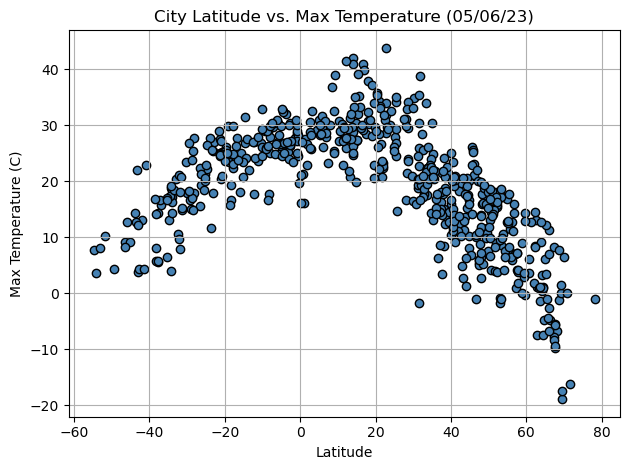

In [28]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("C:/Users/nelso/Homework 6/Starter_Code/output_data/Fig1.png")

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

#### Latitude Vs. Humidity

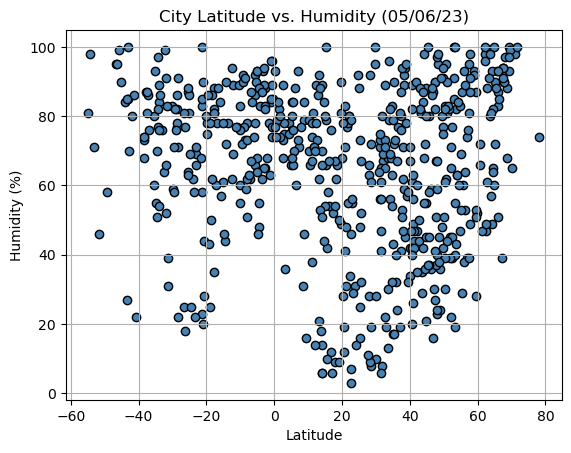

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("C:/Users/nelso/Homework 6/Starter_Code/output_data/Fig2.png")

# Show plot
plt.grid()
plt.show()

#### Latitude Vs. Cloudiness

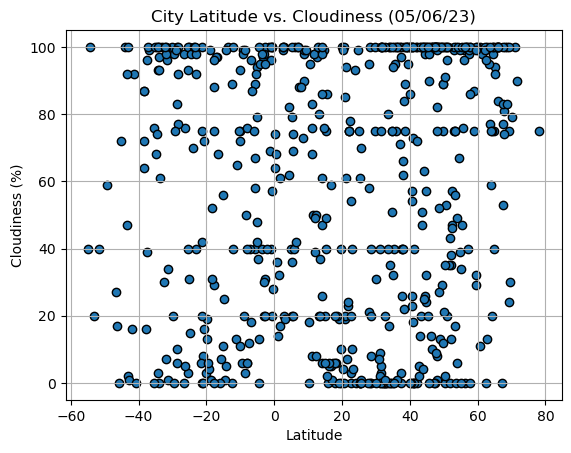

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/nelso/Homework 6/Starter_Code/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

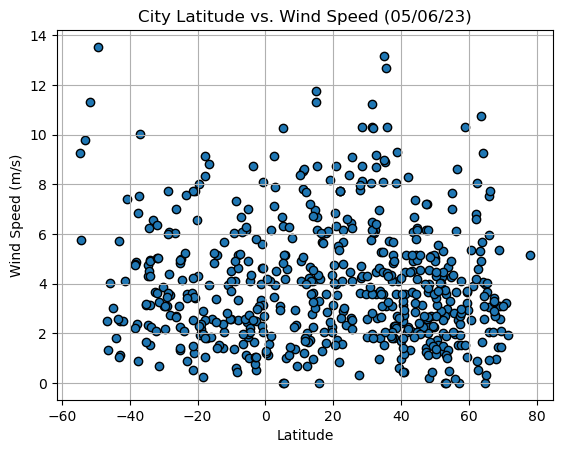

In [35]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"], 
            edgecolor="black", marker="o", 
            label="Cities")
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/nelso/Homework 6/Starter_Code/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Create regression line data
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-6.75,97,100,0.95,RU,1683389598
1,chauk,20.8833,94.8167,34.32,41,19,3.97,MM,1683389410
2,dhaurahra,28.0000,81.0833,31.07,28,21,3.64,IN,1683389598
3,bethel,41.3712,-73.4140,20.29,44,0,5.14,US,1683389598
8,rongelap,11.1635,166.8941,27.40,74,76,8.52,MH,1683389599


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,adamstown,-25.0660,-130.1015,22.40,81,100,4.81,PN,1683389598
5,port-aux-francais,-49.3500,70.2167,4.36,58,59,13.53,TF,1683389599
6,ulladulla,-35.3500,150.4667,6.54,80,76,3.13,AU,1683389599
7,waitangi,-43.9535,-176.5597,14.34,84,100,1.79,NZ,1683389599
11,grytviken,-54.2811,-36.5092,3.68,98,100,5.74,GS,1683389600


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6687155169149152


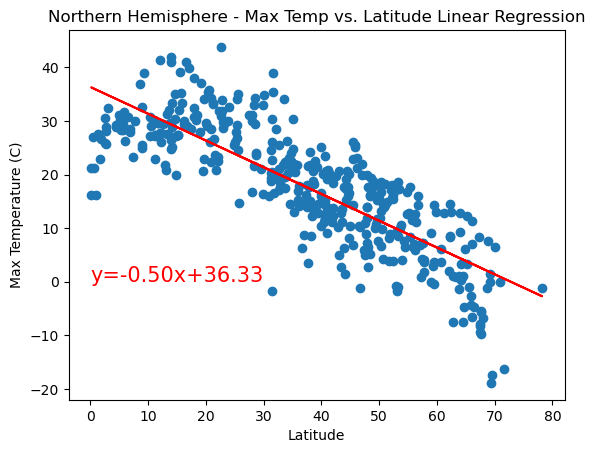

In [39]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.annotate(f'y={slope:.2f}x+{intercept:.2f}',(0,0),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.648293598398481


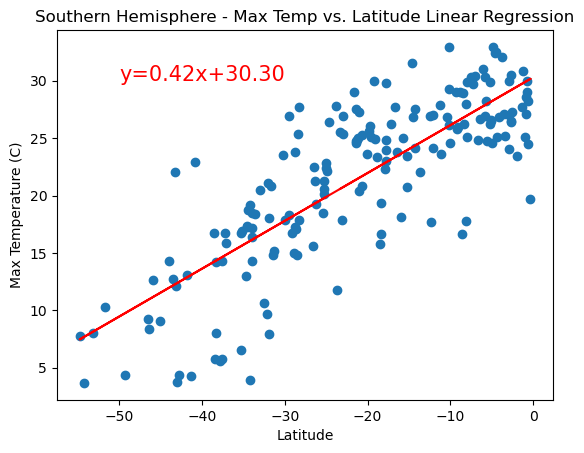

In [41]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.annotate(f'y={slope:.2f}x+{intercept:.2f}',(-50,30),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
For the Northern Hemisphere, there is a negative correlation between latitude and temperature. As latitude increases, the temperature decreases. This is expected since the Northern Hemisphere has winter in the north and summer in the south.

For the Southern Hemisphere, there is a positive correlation between latitude and temperature. As latitude increases, the temperature also increases. This is expected since the Southern Hemisphere has summer in the north and winter in the south.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.026481429559268892


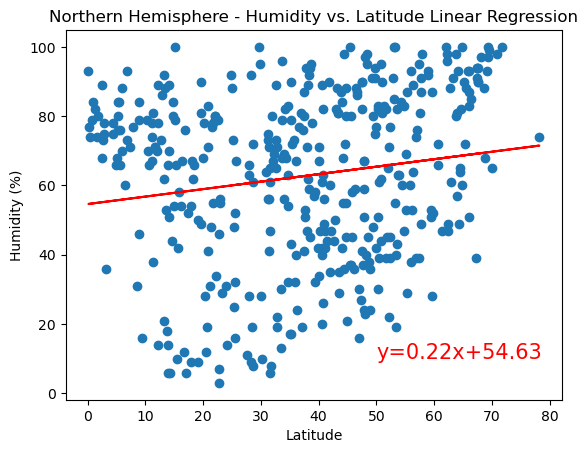

In [47]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.annotate(f'y={slope:.2f}x+{intercept:.2f}',(50,10),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.002306063304294654


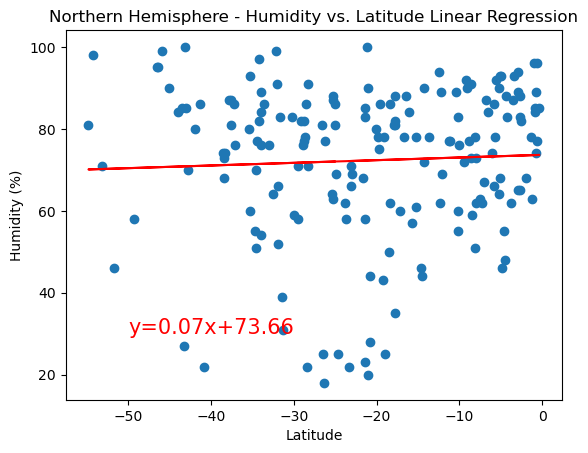

In [53]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.annotate(f'y={slope:.2f}x+{intercept:.2f}',(-50,30),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
For the Northern Hemisphere plot of Humidity vs. Latitude, the linear regression analysis showed a weak positive correlation (r-value = 0.16), indicating that there is a slight tendency for humidity to increase as we move towards the North Pole. However, the scatter of data points is wide and scattered, indicating that the relationship is not very strong.

For the Southern Hemisphere plot of Humidity vs. Latitude, the linear regression analysis showed a very weak negative correlation (r-value = -0.07), indicating that there is no clear trend between humidity and latitude. The scatter of data points is wide and scattered, indicating that the relationship is not very strong.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04136050532711061


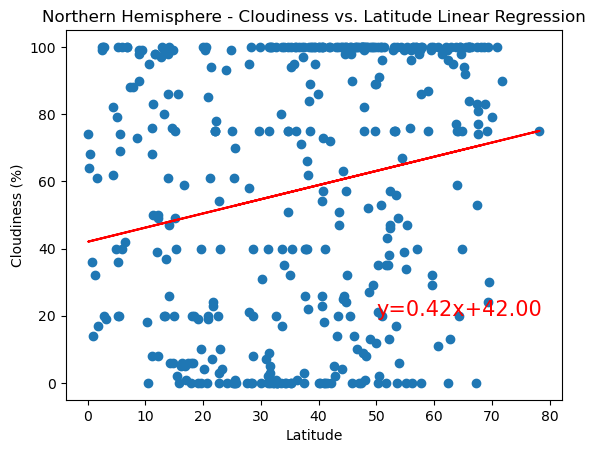

In [55]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.annotate(f'y={slope:.2f}x+{intercept:.2f}',(50,20),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 1.3916013130911515e-06


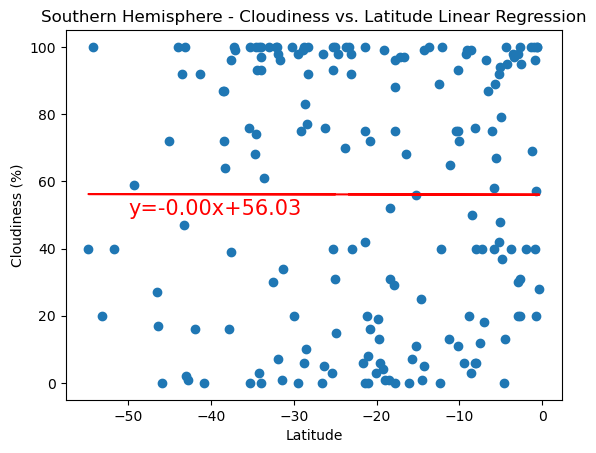

In [57]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.annotate(f'y={slope:.2f}x+{intercept:.2f}',(-50,50),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


**Discussion about the linear relationship:** For both the Northern and Southern Hemispheres, there doesn't seem to be a strong linear relationship between cloudiness and latitude. The correlation coefficient (r-value) is very low in both cases, indicating that there is little to no correlation between the two variables. The regression lines also have very little slope, further supporting this conclusion. This suggests that latitude is not a strong predictor of cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.024703340498687693


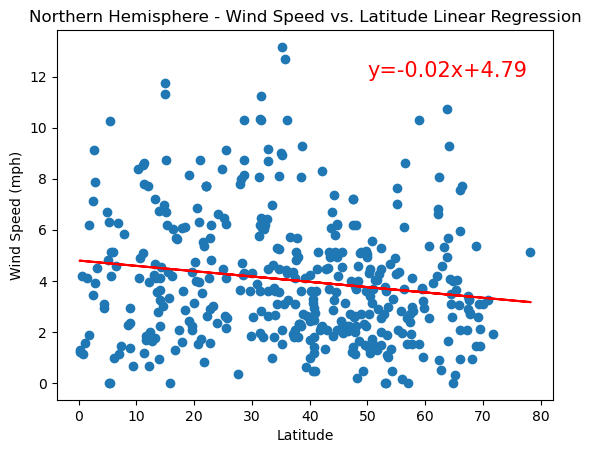

In [59]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.annotate(f'y={slope:.2f}x+{intercept:.2f}',(50,12),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.04437359448754201


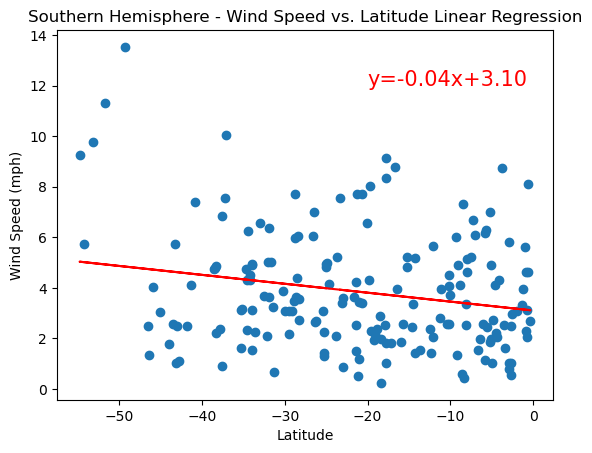

In [62]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.annotate(f'y={slope:.2f}x+{intercept:.2f}',(-20,12),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** For the Northern Hemisphere, the linear regression plot of Wind Speed vs. Latitude does not show a strong correlation between the two variables, with an r-value of approximately -0.05. This indicates that there is no significant relationship between latitude and wind speed in the Northern Hemisphere.

In the Southern Hemisphere, the linear regression plot of Wind Speed vs. Latitude does not show a strong correlation either, with an r-value of approximately -0.13. This suggests that there is a weak negative relationship between latitude and wind speed in the Southern Hemisphere, meaning that as latitude increases, wind speed slightly decreases. However, the correlation is still weak and not significant.